In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)

numpy version: 1.13.3
pandas version: 0.19.2


Plot code credited to a CS120x assignment on edX.

In [2]:
def prepare_plot(xticks, yticks, figsize=(10.5, 6), hide_labels=False, grid_color='#999999',
                 grid_width=1.0):
    """Template for generating the plot layout."""
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hide_labels: axis.set_ticklabels([])
    plt.grid(color=grid_color, linewidth=grid_width, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

Read SkillCraft dataset.

In [3]:
skillcraft = pd.read_csv('SkillCraft1_Dataset.csv')
sc = skillcraft.iloc[:, 5:].values
print(sc.shape)
print(sc.dtype)

(3395, 15)
float64


### Principle Component Analysis (PCA)

Centre the data by subtracting the mean from each feature. Compute covariance matrix.

In [4]:
def estimate_covariance(data):
    mean_data = np.mean(data, axis=0)
    data_cov = np.matmul((data - mean_data).T, (data - mean_data)) * 1. / data.shape[0]
    return data_cov

In [5]:
eig_vals, eig_vecs = np.linalg.eigh(estimate_covariance(sc))
print('eigenvalues: {0}'.format(eig_vals))
print('eigenvectors: {0}'.format(eig_vecs))

# Use np.argsort to find the top eigenvector based on the largest eigenvalue
inds = np.argsort(eig_vals)[::-1]
print('indices that would sort the array in descending order: {0}'.format(inds))

top_component = eig_vecs[:, inds[0]]
print('top principal component: {0}'.format(top_component))

eigenvalues: [  6.46583204e-09   2.28819893e-08   3.01402164e-08   6.25726427e-08
   7.29999752e-08   1.13997160e-07   2.11515977e-07   4.06526378e-06
   1.52535089e+00   2.21277989e+00   4.68856770e+00   4.32937084e+01
   1.05329811e+02   2.50441188e+02   3.02067806e+03]
eigenvectors: [[ -2.22491439e-07  -1.40105715e-06  -8.18247200e-07  -1.53036925e-05
    2.05811131e-05   1.96449673e-06   1.00053614e-05   1.31671278e-04
    1.77614555e-02   5.28102979e-03  -9.72416120e-03  -1.81525242e-02
    7.49810148e-02  -3.31520977e-01  -9.40055445e-01]
 [  1.57918732e-03   8.78498907e-03   1.71399829e-02   8.10903405e-02
   -1.05828716e-01  -1.25557452e-02  -6.23443060e-02  -9.88840534e-01
    1.04439295e-03  -4.99037593e-06   1.27434971e-04   1.58822022e-05
    4.80957232e-05  -1.23170555e-04  -7.75061790e-05]
 [ -1.75633754e-02  -3.48934524e-01  -9.26567580e-01  -1.69991931e-02
   -1.36763298e-01  -1.90723100e-02  -4.75601782e-03  -5.40376688e-03
    1.53903648e-05  -2.76052563e-07   2.26000

In [6]:
def pca(data, k=2):
    cov = estimate_covariance(data)
    eig_vals, eig_vecs = np.linalg.eigh(cov)
    inds = np.argsort(eig_vals)[::-1] # numpy.linalg.eigh returns the eigenvalues in ascending order, take reverse slice
    top_k_components = eig_vecs[:, inds[0:k]]
    scores = np.dot(data, top_k_components)
    # Return the `k` principal components, `k` scores, and all eigenvalues
    return (top_k_components, scores, eig_vals[inds])

Eigenvalues are the variances in the directions specified by eigenvectors. Eigenvector corresponding to the alrgest eigenvalue is the direction of maximal variance ("top" eigenvector).

### Top 2 Components

The following 15 plots each have points coloured by a normalized value, one plot per feature.

In [7]:
top_components, sc_scores, eigenvalues = pca(sc, 2)

print(top_components.shape)
print(sc_scores.shape)
print(eigenvalues.shape)

(15, 2)
(3395, 2)
(15,)


Colour by APM.

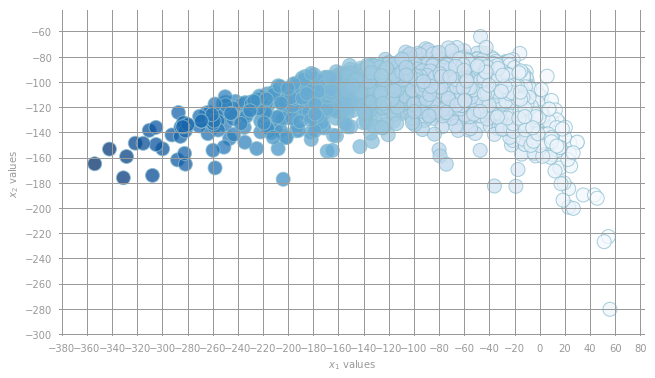

In [8]:
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.cm import get_cmap

norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,0])))[:,0:3] # APM

# generate layout and plot data
fig, ax = prepare_plot(np.arange(-400, 200, 20), np.arange(-400, 60, 20))
ax.set_xlabel(r'$x_1$ values'), ax.set_ylabel(r'$x_2$ values')
#ax.set_xlim(-300, 200), ax.set_ylim(-200, 100)
plt.scatter(sc_scores[:, 0], sc_scores[:, 1], s=14 ** 2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)
#display(fig)

Colour by SelectByHotkeys.

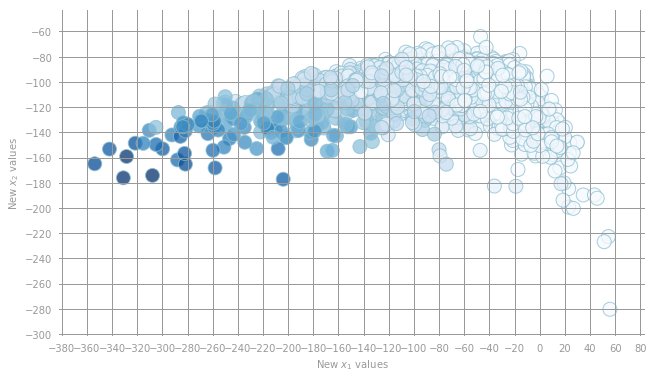

In [9]:
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,1])))[:,0:3] # SelectByHotkeys

fig, ax = prepare_plot(np.arange(-400, 200, 20), np.arange(-400, 60, 20))
ax.set_xlabel(r'New $x_1$ values'), ax.set_ylabel(r'New $x_2$ values')
#ax.set_xlim(5, 150), ax.set_ylim(-45, 50)
plt.scatter(sc_scores[:, 0], sc_scores[:, 1], s=14 ** 2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)
#display(fig)

Colour by AssignToHotkeys.

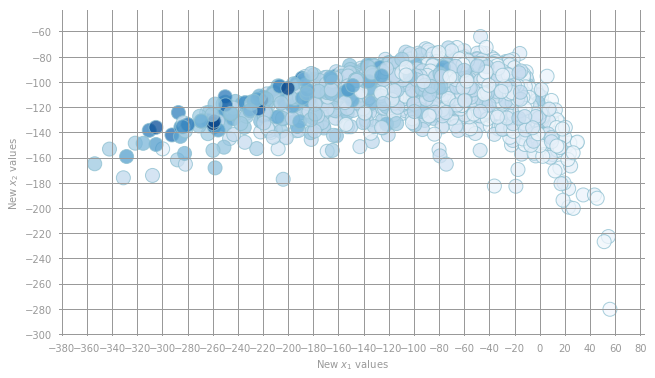

In [10]:
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,2])))[:,0:3] # AssignToHotkeys

fig, ax = prepare_plot(np.arange(-400, 200, 20), np.arange(-400, 60, 20))
ax.set_xlabel(r'New $x_1$ values'), ax.set_ylabel(r'New $x_2$ values')
#ax.set_xlim(5, 150), ax.set_ylim(-45, 50)
plt.scatter(sc_scores[:, 0], sc_scores[:, 1], s=14 ** 2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)
#display(fig)

Colour by UniqueHotkeys.

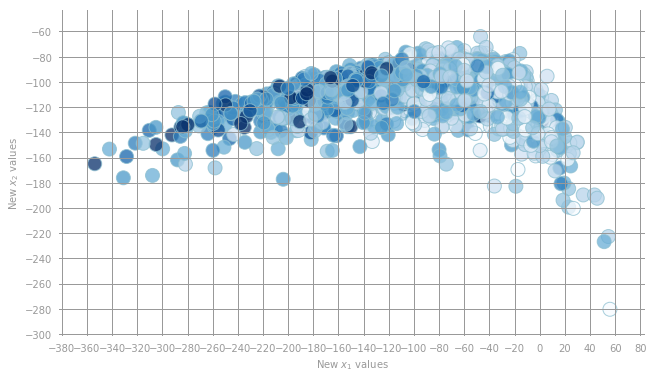

In [11]:
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,3])))[:,0:3] # UniqueHotkeys

fig, ax = prepare_plot(np.arange(-400, 200, 20), np.arange(-400, 60, 20))
ax.set_xlabel(r'New $x_1$ values'), ax.set_ylabel(r'New $x_2$ values')
#ax.set_xlim(5, 150), ax.set_ylim(-45, 50)
plt.scatter(sc_scores[:, 0], sc_scores[:, 1], s=14 ** 2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)
#display(fig)

Colour by MinimapAttacks.

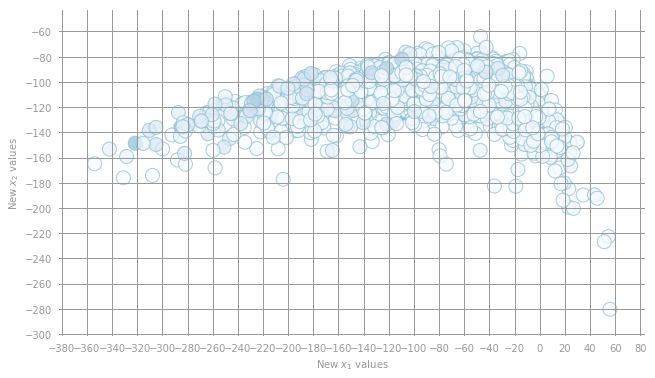

In [12]:
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,4])))[:,0:3] # MinimapAttacks

fig, ax = prepare_plot(np.arange(-400, 200, 20), np.arange(-400, 60, 20))
ax.set_xlabel(r'New $x_1$ values'), ax.set_ylabel(r'New $x_2$ values')
#ax.set_xlim(5, 150), ax.set_ylim(-45, 50)
plt.scatter(sc_scores[:, 0], sc_scores[:, 1], s=14 ** 2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)
#display(fig)

Colour by MinimapRightClicks.

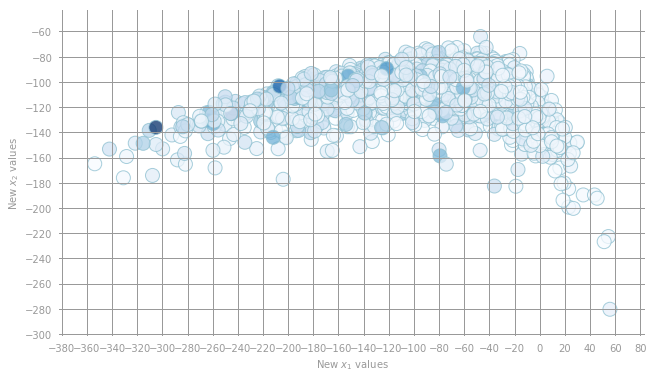

In [13]:
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,5])))[:,0:3] # MinimapRightClicks

fig, ax = prepare_plot(np.arange(-400, 200, 20), np.arange(-400, 60, 20))
ax.set_xlabel(r'New $x_1$ values'), ax.set_ylabel(r'New $x_2$ values')
#ax.set_xlim(5, 150), ax.set_ylim(-45, 50)
plt.scatter(sc_scores[:, 0], sc_scores[:, 1], s=14 ** 2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)
#display(fig)

Colour by NumberOfPACs.

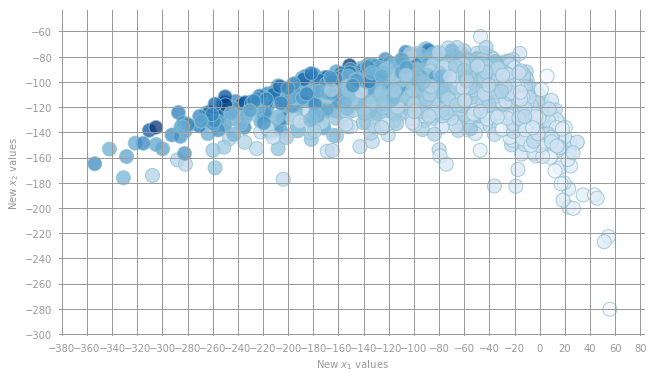

In [14]:
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,6])))[:,0:3] # NumberOfPACs

fig, ax = prepare_plot(np.arange(-400, 200, 20), np.arange(-400, 60, 20))
ax.set_xlabel(r'New $x_1$ values'), ax.set_ylabel(r'New $x_2$ values')
#ax.set_xlim(5, 150), ax.set_ylim(-45, 50)
plt.scatter(sc_scores[:, 0], sc_scores[:, 1], s=14 ** 2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)
#display(fig)

Colour by GapBetweenPACs.

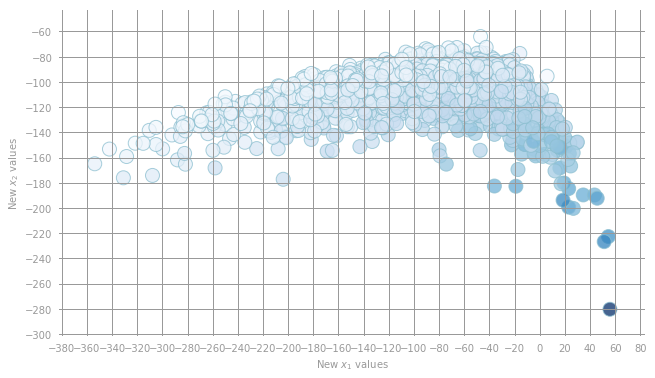

In [15]:
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,7])))[:,0:3] # GapBetweenPACs

fig, ax = prepare_plot(np.arange(-400, 200, 20), np.arange(-400, 60, 20))
ax.set_xlabel(r'New $x_1$ values'), ax.set_ylabel(r'New $x_2$ values')
#ax.set_xlim(5, 150), ax.set_ylim(-45, 50)
plt.scatter(sc_scores[:, 0], sc_scores[:, 1], s=14 ** 2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)
#display(fig)

Colour by Action Latency.

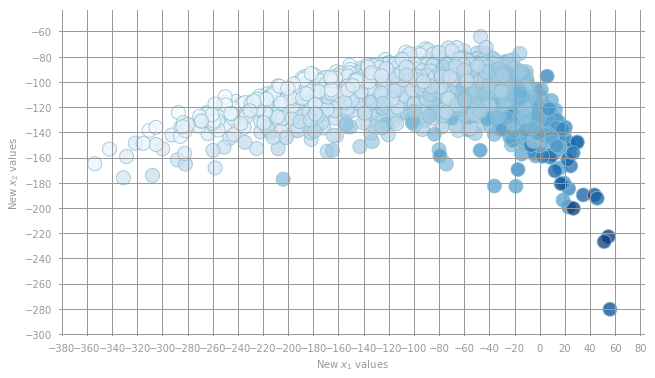

In [16]:
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,8])))[:,0:3] # ActionLatency

fig, ax = prepare_plot(np.arange(-400, 200, 20), np.arange(-400, 60, 20))
ax.set_xlabel(r'New $x_1$ values'), ax.set_ylabel(r'New $x_2$ values')
#ax.set_xlim(5, 150), ax.set_ylim(-45, 50)
plt.scatter(sc_scores[:, 0], sc_scores[:, 1], s=14 ** 2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)
#display(fig)

Colour by ActionsInPAC.

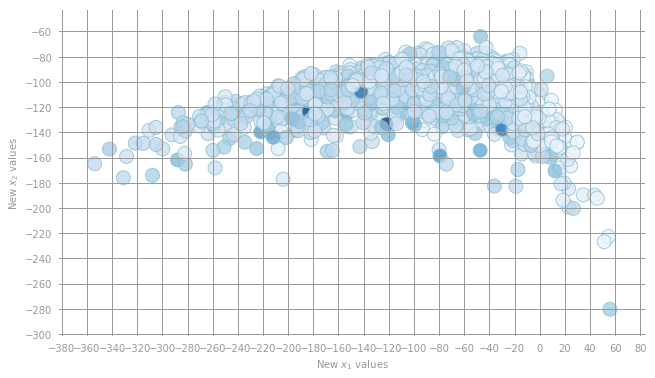

In [17]:
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,9])))[:,0:3] # ActionsInPAC

fig, ax = prepare_plot(np.arange(-400, 200, 20), np.arange(-400, 60, 20))
ax.set_xlabel(r'New $x_1$ values'), ax.set_ylabel(r'New $x_2$ values')
#ax.set_xlim(5, 150), ax.set_ylim(-45, 50)
plt.scatter(sc_scores[:, 0], sc_scores[:, 1], s=14 ** 2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)
#display(fig)

Colour by TotalMapExplored.

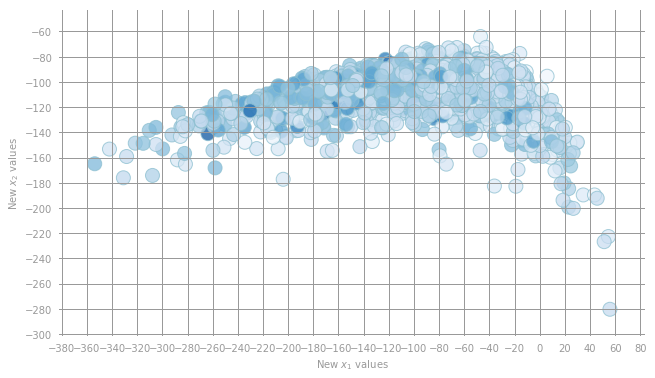

In [18]:
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,10])))[:,0:3] # TotalMapExplored

fig, ax = prepare_plot(np.arange(-400, 200, 20), np.arange(-400, 60, 20))
ax.set_xlabel(r'New $x_1$ values'), ax.set_ylabel(r'New $x_2$ values')
#ax.set_xlim(5, 150), ax.set_ylim(-45, 50)
plt.scatter(sc_scores[:, 0], sc_scores[:, 1], s=14 ** 2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)
#display(fig)

Colour by WorkersMade.

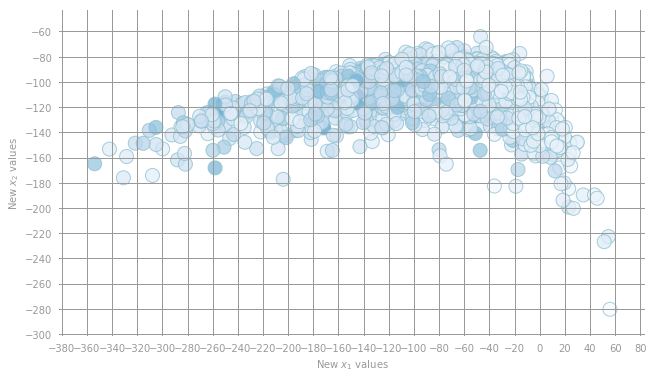

In [19]:
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,11])))[:,0:3] # WorkersMade

fig, ax = prepare_plot(np.arange(-400, 200, 20), np.arange(-400, 60, 20))
ax.set_xlabel(r'New $x_1$ values'), ax.set_ylabel(r'New $x_2$ values')
#ax.set_xlim(5, 150), ax.set_ylim(-45, 50)
plt.scatter(sc_scores[:, 0], sc_scores[:, 1], s=14 ** 2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)
#display(fig)

Colour by UniqueUnitsMade.

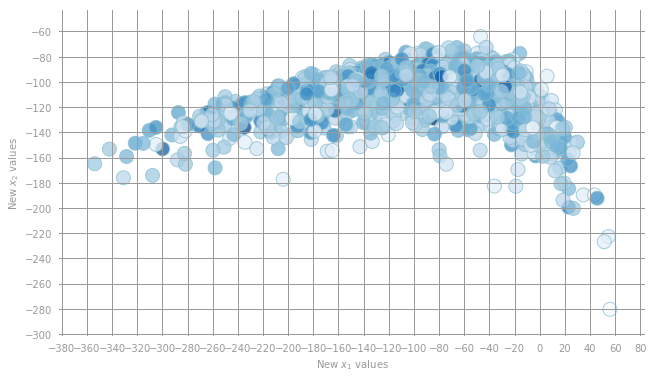

In [20]:
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,12])))[:,0:3] # UniqueUnitsMade

fig, ax = prepare_plot(np.arange(-400, 200, 20), np.arange(-400, 60, 20))
ax.set_xlabel(r'New $x_1$ values'), ax.set_ylabel(r'New $x_2$ values')
#ax.set_xlim(5, 150), ax.set_ylim(-45, 50)
plt.scatter(sc_scores[:, 0], sc_scores[:, 1], s=14 ** 2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)
#display(fig)

Colour by ComplexUnitsMade.

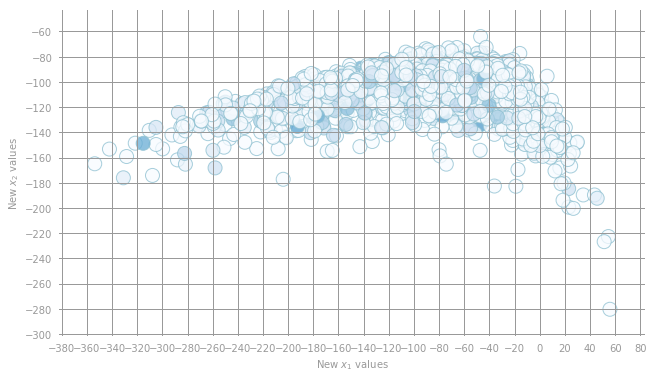

In [21]:
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,13])))[:,0:3] # ComplexUnitsMade

fig, ax = prepare_plot(np.arange(-400, 200, 20), np.arange(-400, 60, 20))
ax.set_xlabel(r'New $x_1$ values'), ax.set_ylabel(r'New $x_2$ values')
#ax.set_xlim(5, 150), ax.set_ylim(-45, 50)
plt.scatter(sc_scores[:, 0], sc_scores[:, 1], s=14 ** 2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)
#display(fig)

Colour by ComplexAbilitiesUsed.

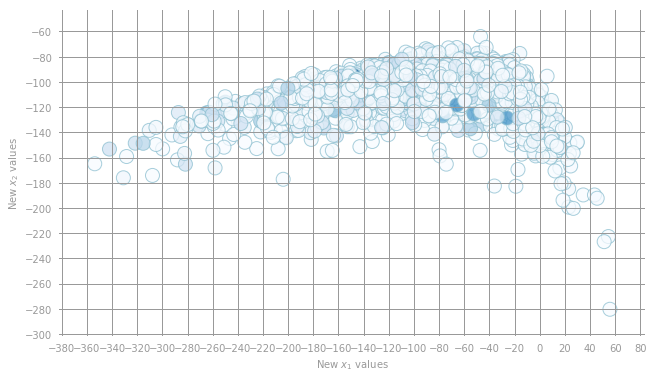

In [22]:
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,14])))[:,0:3] # ComplexAbilitiesUsed

fig, ax = prepare_plot(np.arange(-400, 200, 20), np.arange(-400, 60, 20))
ax.set_xlabel(r'New $x_1$ values'), ax.set_ylabel(r'New $x_2$ values')
#ax.set_xlim(5, 150), ax.set_ylim(-45, 50)
plt.scatter(sc_scores[:, 0], sc_scores[:, 1], s=14 ** 2, c=clrs, edgecolors='#8cbfd0', alpha=0.75)
#display(fig)

### PCA Top 3 components for SkillCraft

In [23]:
top_components_threeD, sc_threeD_scores, eigenvalues_threeD = pca(sc, 3)
print(top_components_threeD.shape)
print(sc_threeD_scores.shape)
print(eigenvalues_threeD.shape)

(15, 3)
(3395, 3)
(15,)


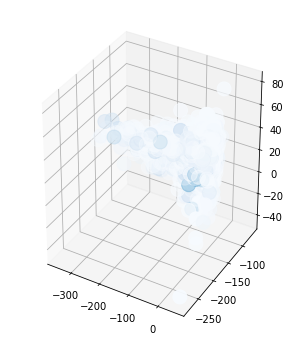

In [24]:
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.colors import ListedColormap, Normalize
from matplotlib.cm import get_cmap
norm = Normalize()
cmap = get_cmap("Blues")
clrs = cmap(np.array(norm(sc[:,14])))[:,0:3]

fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(sc_threeD_scores[:,0], sc_threeD_scores[:,1], sc_threeD_scores[:,2], c=clrs, s=14**2)

In [25]:
def variance_explained(data, k=1):
    """Calculate the fraction of variance explained by the top `k` eigenvectors.

    Args:
        data: A NumPy arrays which store the features for an observation.
        k: The number of principal components to consider.

    Returns:
        float: A number between 0 and 1 representing the percentage of variance explained
            by the top `k` eigenvectors.
    """
    components, scores, eigenvalues = pca(data, k)
    return np.sum(eigenvalues[0:k]) / np.sum(eigenvalues)

In [26]:
variance_1 = variance_explained(sc, 1)
variance_2 = variance_explained(sc, 2)
variance_3 = variance_explained(sc, 3)
variance_4 = variance_explained(sc, 4)
variance_5 = variance_explained(sc, 5)
variance_6 = variance_explained(sc, 6)
variance_7 = variance_explained(sc, 7)
variance_8 = variance_explained(sc, 8)
print('Percentage of variance explained by the first component of SkillCraft data: {0:.1f}%'
      .format(variance_1 * 100))
print('Percentage of variance explained by the first two components of SkillCraft data: {0:.1f}%'
      .format(variance_2 * 100))
print('Percentage of variance explained by the first three components of SkillCraft data: {0:.1f}%'
      .format(variance_3 * 100))
print('Percentage of variance explained by the first four components of SkillCraft data: {0:.1f}%'
      .format(variance_4 * 100))
print('Percentage of variance explained by the first five components of SkillCraft data: {0:.1f}%'
      .format(variance_5 * 100))
print('Percentage of variance explained by the first six components of SkillCraft data: {0:.1f}%'
      .format(variance_6 * 100))
print('Percentage of variance explained by the first seven components of SkillCraft data: {0:.1f}%'
      .format(variance_7 * 100))
print('Percentage of variance explained by the first eight components of SkillCraft data: {0:.1f}%'
      .format(variance_8 * 100))

Percentage of variance explained by the first component of SkillCraft data: 88.1%
Percentage of variance explained by the first two components of SkillCraft data: 95.4%
Percentage of variance explained by the first three components of SkillCraft data: 98.5%
Percentage of variance explained by the first four components of SkillCraft data: 99.8%
Percentage of variance explained by the first five components of SkillCraft data: 99.9%
Percentage of variance explained by the first six components of SkillCraft data: 100.0%
Percentage of variance explained by the first seven components of SkillCraft data: 100.0%
Percentage of variance explained by the first eight components of SkillCraft data: 100.0%
